# CIA World Factbook

In this project, we'll work with data from the CIA World Factbook, a compendium of statistics about all of the countries on Earth. The Factbook contains demographic information like:

- **population** - The population as of 2015.
- **population_growth** - The annual population growth rate, as a percentage.
- **area** - The total land and water area.

In [35]:
import sqlite3
import pandas as pd
import matplotlib as mlt
%matplotlib inline
conn = sqlite3.connect("factbook.db")

q = "SELECT * FROM sqlite_master WHERE type='table';"
pd.read_sql_query(q, conn)

,type,name,tbl_name,rootpage,sql
0,table,sqlite_sequence,sqlite_sequence,3,"CREATE TABLE sqlite_sequence(name,seq)"
1,table,facts,facts,47,"CREATE TABLE ""facts"" (""id"" INTEGER PRIMARY KEY..."


In [7]:
q = "SELECT * FROM facts"
facts = pd.read_sql_query(q, conn)

In [8]:
facts.head()

,id,code,name,area,area_land,area_water,population,population_growth,birth_rate,death_rate,migration_rate
0,1,af,Afghanistan,652230.0,652230.0,0.0,32564342.0,2.32,38.57,13.89,1.51
1,2,al,Albania,28748.0,27398.0,1350.0,3029278.0,0.30,12.92,6.58,3.30
2,3,ag,Algeria,2381741.0,2381741.0,0.0,39542166.0,1.84,23.67,4.31,0.92
3,4,an,Andorra,468.0,468.0,0.0,85580.0,0.12,8.13,6.96,0.00
4,5,ao,Angola,1246700.0,1246700.0,0.0,19625353.0,2.78,38.78,11.49,0.46


- name - The name of the country.
- area - The total land and sea area of the country.
- population - The country's population.
- population_growth- The country's population growth as a percentage.
- birth_rate - The country's birth rate, or the number of births a year per 1,000 people.
- death_rate - The country's death rate, or the number of death a year per 1,000 people.
- area- The country's total area (both land and water).
- area_land - The country's land area in square kilometers.
- area_water - The country's waterarea in square kilometers.

In [10]:
q = "SELECT MIN(POPULATION)\
            , MAX(POPULATION)\
            , MIN(POPULATION)\
            , MAX(POPULATION)\
    FROM FACTS"

pd.read_sql_query(q, conn)

,MIN(POPULATION),MAX(POPULATION),MIN(POPULATION),MAX(POPULATION)
0,0,7256490011,0,7256490011


A few things stick out from the summary statistics in the last screen:

there's a country with a population of 0
there's a country with a population of 7256490011 (or more than 7.2 billion people)  

Which doesn't really make sense. If a country's population is zero, is it really a country? Also the world population is about 7 billion. Therefore, one country can't have entire population. 

Let's zoom in on just these countries.

In [11]:
q = "SELECT *\
    FROM FACTS WHERE POPULATION IN (0, 7256490011)"

pd.read_sql_query(q, conn)

,id,code,name,area,area_land,area_water,population,population_growth,birth_rate,death_rate,migration_rate
0,250,ay,Antarctica,None,280000.0,None,0,NaN,NaN,NaN,None
1,261,xx,World,None,NaN,None,7256490011,1.08,18.6,7.8,None


Okay one is Antarctica and the other one is the row to respent the whole world. So it does make sense.

In [33]:
facts_no_outlier = facts[(facts['id'] != 250) & (facts['id'] != 261)]

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f347b501b00>,
      dtype=object)

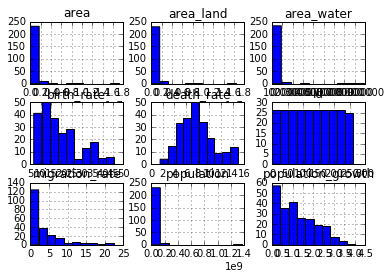

In [36]:
facts_no_outlier[['population']].hist()